<a href="https://colab.research.google.com/github/munyuawilson/Data-visualization-Data-science/blob/main/sentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Analysis**

This is a sentiment analysis of tweets. 


**Loading the Libraries**

In [5]:

%pip install textblob 
import nltk
import numpy as np
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


**Loading the dataset**

In [6]:
data=pd.read_csv('/content/drive/MyDrive/Twitter_Data.csv')
#if implementing it offline use
#data=pd.read_csv("Twitter_Data.csv")
#remove the category column so as to do a fresh analysis
data=data.clean_text

data=pd.DataFrame(data)
data=data.head(100)

**Remove stopwords**

In [7]:

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = stopwords.words('english')

#Filtering stop words

data['tweet_without_stopwords'] = data["clean_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

filtered_data=pd.DataFrame(data['tweet_without_stopwords'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Sentiment analysis**

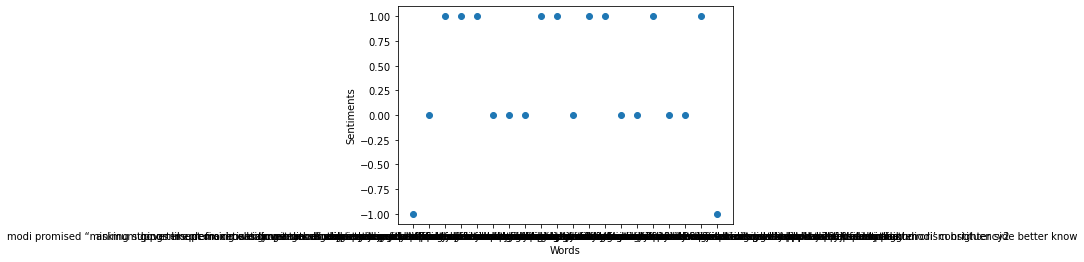

In [9]:

sentiment_list=[]
for f in filtered_data.tweet_without_stopwords:
  sentiment=TextBlob(f).sentiment.polarity
  if sentiment > 0:
    sentiment_list.append(1)
    #positive
  elif sentiment < 0:
    sentiment_list.append(-1)
    #negative
  else:
    sentiment_list.append(0)
    #neutral
filtered_data["sentiments"]=sentiment_list

plt.scatter(filtered_data.head(20).tweet_without_stopwords,filtered_data.head(20).sentiments)
plt.xlabel("Words")
plt.ylabel("Sentiments")

plt.savefig("graph.png")

**Machine Learning Model**

In [10]:
X=filtered_data.tweet_without_stopwords
y=filtered_data.sentiments

filtered_train,filtered_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#use Bag of Words to convert the text data into numerical data
vectorizer=CountVectorizer()
vectorizer.fit(filtered_train)
x_train=vectorizer.transform(filtered_train)
x_test=vectorizer.transform(filtered_test)

#Training
model=LogisticRegression()

model.fit(x_train,y_train)
#Accuracy score
score=model.score(x_test,y_test)

print(score)
  





0.6
